<a href="https://colab.research.google.com/github/EdissonMC/tokenization-comparison-pretrained/blob/main/tokenizer_comparator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project explores how different transformer-based language models tokenize the same input text.

I will compare tokenization strategies used by BERT (WordPiece), GPT-2 (Byte Pair Encoding), and XLNet (SentencePiece).

I will visualize and analyze token output, allowing users to see how the same sentence is broken down differently by each model.

I will implement next features, looking forward to undertand diferent types of the tokenizers:

- How different transformer models tokenize text using different strategies.
- The differences in subword tokenization algorithms: WordPiece, BPE, and SentencePiece.
- Simple Gradio interface for this applications running in real time.

How to Run ?

1. Clone the repository and open the notebook in Google Colab or your local Jupyter environment.
2. Make sure to install the required libraries:
3. Run all cells step-by-step to see the tokenization process and interact with the Gradio app.

I use pretrained tokenizers from Hugging Face's `transformers` library:

- `BertTokenizer` (WordPiece)
- `GPT2Tokenizer` (Byte Pair Encoding)
- `XLNetTokenizer` (SentencePiece)

These tokenizers demonstrate distinct methods for splitting text into subwords, an essential step in transformer-based models.

Tokenizers Used
This project compares how three popular NLP models tokenize text using different algorithms. Here's a quick summary of each:

BERT – WordPiece Tokenizer
BERT uses the WordPiece tokenization algorithm. It starts with complete words and breaks them into subwords only when necessary. This helps in handling rare or unseen words efficiently.

Example: "unbelievable" → ["un", "##believable"]

Key Feature: Keeps most common words intact, breaking only unfamiliar parts.

GPT-2 – Byte Pair Encoding (BPE)
GPT-2 uses Byte Pair Encoding (BPE), which starts from characters and gradually merges the most frequent pairs of tokens. It's known for striking a balance between efficiency and vocabulary size.

Example: "unbelievable" → ["un", "bel", "iev", "able"]

Key Feature: Handles informal language and typos better due to its flexible subword merges.

XLNet – SentencePiece Tokenizer
XLNet uses SentencePiece, which treats input text as a raw sequence without assuming spaces between words. This makes it very flexible, especially for non-space-delimited languages.

Example: "unbelievable" → ["▁un", "believable"]

Key Feature: Works directly on raw text and handles multilingual input gracefully.




In [1]:
!pip install -q transformers gradio

In [2]:
from transformers import AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt
import gradio as gr
from transformers import BertTokenizer, GPT2Tokenizer, XLNetTokenizer


In [3]:
# Cargar tokenizadores de distintos modelos
#bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
#gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")
#xlnet_tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")

# Inicializamos los tokenizers (esto se hace una vez)
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
xlnet_tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In this section i tokenize the input using each tokenizer's with the  `.tokenize()` method to extract the list of string tokens (not token IDs).
Each model’s tokenizer breaks the sentence into subword tokens based on its vocabulary and algorithm.



The example of paragraph i used here in, is a passage from Robert Frost's poem:

> "Two roads diverged in a yellow wood,  
> And sorry I could not travel both  
> And be one traveler, long I stood  
> And looked down one as far as I could  
> To where it bent in the undergrowth."

In [4]:
text = """Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth."""

bert_tokens = bert_tokenizer.tokenize(text)
gpt2_tokens = gpt2_tokenizer.tokenize(text)
xlnet_tokens = xlnet_tokenizer.tokenize(text)


# Mostrar cantidad de tokens
print("BERT tokens:", len(bert_tokens))
print("GPT-2 tokens:", len(gpt2_tokens))
print("XLNet tokens:", len(xlnet_tokens))

BERT tokens: 42
GPT-2 tokens: 46
XLNet tokens: 42


In this section  i will visualize the tokenized output and the number of tokens generated per tokenizer.
I am using Matplotlib , for  display the len of tokens generated, so we could see:

- A bar chart showing the number of tokens each tokenizer produces.
- A side-by-side token comparison in a table.

This gives a clear view of how tokenization varies across models.


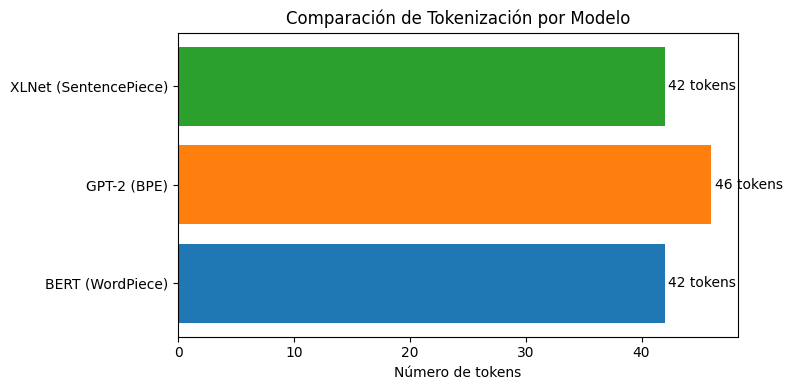

In [5]:
import matplotlib.pyplot as plt



# Datos para graficar
models = ['BERT (WordPiece)', 'GPT-2 (BPE)', 'XLNet (SentencePiece)']
token_counts = [len(bert_tokens), len(gpt2_tokens), len(xlnet_tokens)]

# Gráfico de barras horizontal
plt.figure(figsize=(8, 4))
bars = plt.barh(models, token_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel("Número de tokens")
plt.title("Comparación de Tokenización por Modelo")

# Añadir etiquetas a las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2,
             f'{width} tokens', va='center')

plt.tight_layout()
plt.show()


This function takes a user-provided input sentence and tokenizes it using three different models:

- **BERT**, which uses WordPiece tokenization
- **GPT-2**, which uses Byte Pair Encoding (BPE)
- **XLNet**, which uses SentencePiece

Each tokenizer returns a list of tokens, but since they can produce different numbers of tokens, I have padding each list with empty strings to make them with the same length. This ensures we can present them side-by-side in a table (pandas DataFrame) for comparison.

The resulting DataFrame has three columns, one for each tokenizer, with aligned token positions. This makes it easy to see how the same input is processed differently by each model.


In [6]:


def tokenize_text(text):
    bert_tokens = bert_tokenizer.tokenize(text)
    gpt2_tokens = gpt2_tokenizer.tokenize(text)
    xlnet_tokens = xlnet_tokenizer.tokenize(text)

    # Padding para alinear longitudes
    max_len = max(len(bert_tokens), len(gpt2_tokens), len(xlnet_tokens))
    bert_tokens += [''] * (max_len - len(bert_tokens))
    gpt2_tokens += [''] * (max_len - len(gpt2_tokens))
    xlnet_tokens += [''] * (max_len - len(xlnet_tokens))

    # DataFrame
    df = pd.DataFrame({
        "BERT (WordPiece)": bert_tokens,
        "GPT-2 (BPE)": gpt2_tokens,
        "XLNet (SentencePiece)": xlnet_tokens
    })


    return df




In [7]:

text = """Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth."""

df = tokenize_text(text)

# Mostrarlo bonito
df.style.set_table_styles([
        {"selector": "th", "props": [("font-weight", "bold"), ("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "center")]}
])


,BERT (WordPiece),GPT-2 (BPE),XLNet (SentencePiece)
0,two,Two,▁Two
1,roads,Ġroads,▁roads
2,diver,Ġdiver,▁diverge
3,##ged,ged,d
4,in,Ġin,▁in
5,a,Ġa,▁a
6,yellow,Ġyellow,▁yellow
7,wood,Ġwood,▁wood
8,",",",",","
9,and,Ċ,▁And



I used Gradio to create a simple and interactive web interface that lets users experiment with different tokenization strategies.

Inputs: A multiline text box where users can type or paste a sentence.

Outputs: A table that displays the tokenized output from BERT, GPT-2, and XLNet.

Function: The tokenize_interface function wraps my main tokenize_text logic and returns a DataFrame for Gradio to render.

When the interface is launched, it presents a clean UI where users can try various sentences and instantly see how each model processes the input.

The interface runs locally and also generated a link for shared the app, after run this cell.



In [ ]:
interface = gr.Interface(
    fn=tokenize_text,
    inputs=gr.Textbox(label="Escribe una oración para tokenizar"),
    outputs=gr.Dataframe(label="Tokens por modelo"),
    title="Comparador de Tokenizers (BERT vs GPT-2 vs XLNet)",
    description="Este demo tokeniza tu entrada con 3 algoritmos diferentes de tokenización."
)

interface.launch(debug=True)



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://dcbd8562d9419cba37.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
